# **Proyecto Final: (*Identificación de enfermedades en plantas a partir de imágenes*)**

## **Autores**: 
- Vivian Natalia Gómez Cubillos 
- Kelly Katherine Penaranda Rivera

# **Contenido**
1. [**Abstract**](#id1)
2. [**Introducción**](#id2)
3. [**Estado del arte**](#id3)
4. [**Materiales y Métodos**](#id4)
5. [**Resultados**](#id5)
6. [**Conclusión y discusión**](#id6)
7. [**Bibliografía**](#id7)


## **1. Abstract**<a name="id1"></a>
Cuerpo del abstract

## **2. Introducción**<a name="id2"></a>

Cuerpo de la introducción

## **3. Estado del arte**<a name="id3"></a>

Estado del arte

## **4. Materiales y Métodos**<a name="id4"></a>

In [59]:
import os
import requests
import glob
from tqdm.auto import tqdm
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage import color
from os.path import isfile, join
from os import listdir
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import re

In [60]:
def visualize(img, title, figsize: tuple=None):
    """
    A more complex function to plot an image it has
    an account on the figsize
    :param img: the image to be shown
    :param title: the title of the image
    :param figsize: the size of the image
    :type figsize: tuple
    """
    # Creates the figure
    fig: plt.Figure = plt.figure()

    # Validate the figsize
    if figsize:
        fig.set_figwidth(figsize[0])
        fig.set_figheight(figsize[1])
    # Shows image
    plt.imshow(img)

    # Show title
    plt.title(title)
    plt.axis("off")

In [4]:
def get_count_class(directory):
    if not os.path.exists(directory):
        return 0
    count=0
    for current_path,dirs,files in os.walk(directory):
        for file in files:
            count+= 1
            img = plt.imread(os.path.join(current_path,file))
            image_list.append(convert_image_to_array(image_directory))
            #print(file)
    return count

In [5]:
def get_count_classes(directory):
    if not os.path.exists(directory):
        return 0
    count=0
    for current_path,dirs,files in os.walk(directory):
        for dr in dirs:
            count+= 1
            print(dr+": ", str(get_count_class(current_path+dr+"/")))
    print('-------------------------------------------------------')
    return count

In [5]:
path = './input/plantvillage-dataset/color/' 
print('CLASSES - COlOR:')
print('-------------------------------------------------------')
print('TOTAL NUMBER OF CLASSES: ', str(get_count_classes(path)))
print('-------------------------------------------------------')

CLASSES - COlOR:
-------------------------------------------------------
Apple___Apple_scab:  630
Apple___Black_rot:  621
Apple___Cedar_apple_rust:  275
Apple___healthy:  1645
Blueberry___healthy:  1502
Cherry_(including_sour)___healthy:  854
Cherry_(including_sour)___Powdery_mildew:  1052
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot:  513
Corn_(maize)___Common_rust_:  1192
Corn_(maize)___healthy:  1162
Corn_(maize)___Northern_Leaf_Blight:  985
Grape___Black_rot:  1180
Grape___Esca_(Black_Measles):  1383
Grape___healthy:  423
Grape___Leaf_blight_(Isariopsis_Leaf_Spot):  1076
Orange___Haunglongbing_(Citrus_greening):  5507
Peach___Bacterial_spot:  2297
Peach___healthy:  360
Pepper,_bell___Bacterial_spot:  997
Pepper,_bell___healthy:  1478
Potato___Early_blight:  1000
Potato___healthy:  152
Potato___Late_blight:  1000
Raspberry___healthy:  371
Soybean___healthy:  5090
Squash___Powdery_mildew:  1835
Strawberry___healthy:  456
Strawberry___Leaf_scorch:  1109
Tomato___Bacterial_spot: 

In [7]:
path = './input/plantvillage-dataset/grayscale/' 
print('CLASSES - GRAYSCALE:')
print('-------------------------------------------------------')
print('TOTAL NUMBER OF CLASSES: ', str(get_count_classes(path)))
print('-------------------------------------------------------')

CLASSES - GRAYSCALE:
-------------------------------------------------------
Apple___Apple_scab:  630
Apple___Black_rot:  621
Apple___Cedar_apple_rust:  275
Apple___healthy:  1645
Blueberry___healthy:  1502
Cherry_(including_sour)___healthy:  854
Cherry_(including_sour)___Powdery_mildew:  1052
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot:  513
Corn_(maize)___Common_rust_:  1192
Corn_(maize)___healthy:  1162
Corn_(maize)___Northern_Leaf_Blight:  985
Grape___Black_rot:  1180
Grape___Esca_(Black_Measles):  1383
Grape___healthy:  423
Grape___Leaf_blight_(Isariopsis_Leaf_Spot):  1076
Orange___Haunglongbing_(Citrus_greening):  5507
Peach___Bacterial_spot:  2297
Peach___healthy:  360
Pepper,_bell___Bacterial_spot:  997
Pepper,_bell___healthy:  1478
Potato___Early_blight:  1000
Potato___healthy:  152
Potato___Late_blight:  1000
Raspberry___healthy:  371
Soybean___healthy:  5090
Squash___Powdery_mildew:  1835
Strawberry___healthy:  456
Strawberry___Leaf_scorch:  1109
Tomato___Bacterial_sp

In [8]:
path = './input/plantvillage-dataset/segmented/' 
print('CLASSES - SEGMENTED:')
print('-------------------------------------------------------')
print('TOTAL NUMBER OF CLASSES: ', str(get_count_classes(path)))
print('-------------------------------------------------------')

CLASSES - SEGMENTED:
-------------------------------------------------------
Apple___Apple_scab:  630
Apple___Black_rot:  621
Apple___Cedar_apple_rust:  275
Apple___healthy:  1645
Blueberry___healthy:  1502
Cherry_(including_sour)___healthy:  854
Cherry_(including_sour)___Powdery_mildew:  1052
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot:  513
Corn_(maize)___Common_rust_:  1192
Corn_(maize)___healthy:  1162
Corn_(maize)___Northern_Leaf_Blight:  985
Grape___Black_rot:  1180
Grape___Esca_(Black_Measles):  1384
Grape___healthy:  423
Grape___Leaf_blight_(Isariopsis_Leaf_Spot):  1076
Orange___Haunglongbing_(Citrus_greening):  5507
Peach___Bacterial_spot:  2297
Peach___healthy:  360
Pepper,_bell___Bacterial_spot:  997
Pepper,_bell___healthy:  1478
Potato___Early_blight:  1000
Potato___healthy:  152
Potato___Late_blight:  1000
Raspberry___healthy:  371
Soybean___healthy:  5090
Squash___Powdery_mildew:  1835
Strawberry___healthy:  456
Strawberry___Leaf_scorch:  1109
Tomato___Bacterial_sp

In [61]:
# Dimension of resized image
default_image_size = tuple((256, 256))
data_dir = './input/plantvillage-dataset/color/'

# Number of images used to train the model
MAX_IMAGES_OF_CLASS = 200


In [62]:
def convert_image_to_array(image_dir):
    try:
        image = plt.imread(image_dir)
        if image is not None :
            image = image.reshape(256, 256, 3)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [63]:
dataColor, targetColor = [], []

In [64]:
try:
    print("Loading images ...")
    plant_disease_folder_list = listdir(data_dir)

    for plant_disease_folder in tqdm(plant_disease_folder_list):
        print(f"Current folder Processing {plant_disease_folder} ...")
        plant_disease_image_list = listdir(f"{data_dir}/{plant_disease_folder}/")

        for image in plant_disease_image_list[:MAX_IMAGES_OF_CLASS]:
            image_directory = f"{data_dir}/{plant_disease_folder}/{image}"
            if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True:
                dataColor.append(convert_image_to_array(image_directory).flatten())
                targetColor.append(plant_disease_folder)

    print("Image loading completed")  
except Exception as e:
    print(f"Error : {e}")
    
# Transform the loaded training image data into numpy array
np_image_list = np.array(dataColor, dtype=np.uint8)
print()

# Check the number of images loaded for training
image_len = len(dataColor)
print(f"Total number of images: {image_len}")

Loading images ...


Current folder Processing Apple___Apple_scab ...
Current folder Processing Apple___Black_rot ...
Current folder Processing Apple___Cedar_apple_rust ...
Current folder Processing Apple___healthy ...
Current folder Processing Blueberry___healthy ...
Current folder Processing Cherry_(including_sour)___healthy ...
Current folder Processing Cherry_(including_sour)___Powdery_mildew ...
Current folder Processing Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot ...
Current folder Processing Corn_(maize)___Common_rust_ ...
Current folder Processing Corn_(maize)___healthy ...
Current folder Processing Corn_(maize)___Northern_Leaf_Blight ...
Current folder Processing Grape___Black_rot ...
Current folder Processing Grape___Esca_(Black_Measles) ...
Current folder Processing Grape___healthy ...
Current folder Processing Grape___Leaf_blight_(Isariopsis_Leaf_Spot) ...
Current folder Processing Orange___Haunglongbing_(Citrus_greening) ...
Current folder Processing Peach___Bacterial_spot ...
Current f

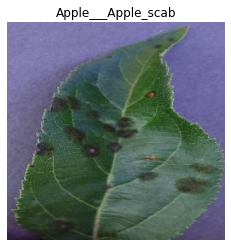

In [65]:
imgConv = np_image_list[1].reshape(256, 256, 3)
visualize(imgConv, targetColor[1])

In [105]:
def visualize_subplot(imgs: list, titles: list, 
                    division: tuple, figsize: tuple=None):
    # We create the figure
    fig: plt.Figure = plt.figure(figsize=figsize)

    # Validate the figsize
    if figsize:
        fig.set_figwidth(figsize[0])
        fig.set_figheight(figsize[1])

    # We make some assertions, the number of images and the number of titles
    # must be the same
    assert len(imgs) == len(titles), "La lista de imágenes y de títulos debe ser del mismo tamaño "+str(len(titles))+"!="+str(len(imgs)) 

    # The division must have sense w.r.t. the number of images
    assert np.prod(division) >= len(imgs)

    # A loop to plot the images
    for index, title in enumerate(titles):
        ax: plt.Axes = fig.add_subplot(division[0], 
                            division[1], index+1)
        ax.imshow(imgs[index], cmap=cmap)
        ax.set_title(title)
        plt.axis("off")

In [67]:
label_encoder = LabelEncoder()
image_labels = label_encoder.fit_transform(targetColor)

In [68]:
print(label_encoder.classes_)

['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___Powdery_mildew'
 'Cherry_(including_sour)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___Common_rust_' 'Corn_(maize)___Northern_Leaf_Blight'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Squash___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Strawberry___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tom

In [69]:
target_distribution = pd.Series(image_labels).value_counts().sort_index()
target_distribution.index = label_encoder.classes_

In [70]:
target_distribution

Apple___Apple_scab                                    200
Apple___Black_rot                                     200
Apple___Cedar_apple_rust                              200
Apple___healthy                                       200
Blueberry___healthy                                   200
Cherry_(including_sour)___Powdery_mildew              200
Cherry_(including_sour)___healthy                     200
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot    200
Corn_(maize)___Common_rust_                           200
Corn_(maize)___Northern_Leaf_Blight                   200
Corn_(maize)___healthy                                200
Grape___Black_rot                                     200
Grape___Esca_(Black_Measles)                          200
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)            200
Grape___healthy                                       200
Orange___Haunglongbing_(Citrus_greening)              200
Peach___Bacterial_spot                                200
Peach___health

In [71]:
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 234) 

In [72]:
x_train.shape, y_train.shape

((6041, 196608), (6041,))

In [73]:
x_test.shape, y_test.shape

((1511, 196608), (1511,))

In [74]:
y_train

array([25, 32, 22, ...,  1, 10, 32], dtype=int64)

In [95]:
img = x_train[5136].reshape(256, 256, 3)
x_train[5136].shape

(196608,)

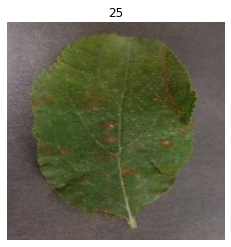

In [89]:
visualize(img, y_train[0])

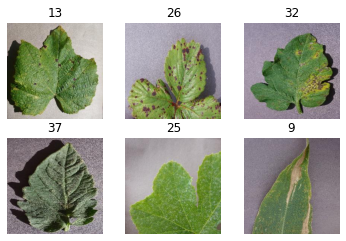

In [127]:
random_sample = np.random.choice(np.arange(len(x_train)), 6)
visualize_subplot(
    x_train[random_sample].reshape(-1, 256, 256, 3),
    y_train[random_sample],  (3, 3), (6, 6)
)

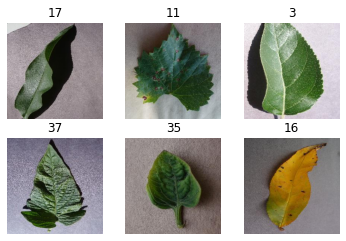

In [128]:
random_sample = np.random.choice(np.arange(len(x_test)), 6)
visualize_subplot(
    x_test[random_sample].reshape(-1, 256, 256, 3),
    y_test[random_sample],  (3, 3), (6, 6)
)

## **5. Resultados**<a name="id5"></a>
Res

## **6. Conclusión y discusión**<a name="id6"></a>

Por medio de todos los casos de prueba realizados con las imágenes seleccionadas y con los resultados obtenidos en cada uno de ellos, pudimos resaltar una serie de observaciones y conclusiones:

### Observaciones:

Obs

### Conclusiones:

En conclusión, 

## **7. Bibliografía**<a name="id7"></a>
Bibliografía